In [3]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df = pd.read_csv(r"data\data_trustpilot.csv")
df.head()

,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,answer,company,verification,answered,local_hour,local_date_posted,days_between_experience_and_post,day_of_week_posted
0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,The company rep I worked with made my…,0,Flashbay,0,0,21,2024-10-22,129,1
1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,I highly recommend using Flashbay,0,Flashbay,1,0,12,2024-10-16,0,2
2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Great customer service,0,Flashbay,1,0,10,2024-10-17,7,3
3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Outstanding Support and Attentive Service,0,Flashbay,1,0,15,2024-10-21,0,0
4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,My number-one go-to for computer…,0,Flashbay,0,0,21,2024-10-22,103,1


In [5]:
#funktion returning the sentiment calculated by TextBlob
def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
# creating a new column with the sentiment from Text_blob 
df['Sentiment_Blob'] = df['text'].apply(lambda text: sentiment_analysis(str(text)))

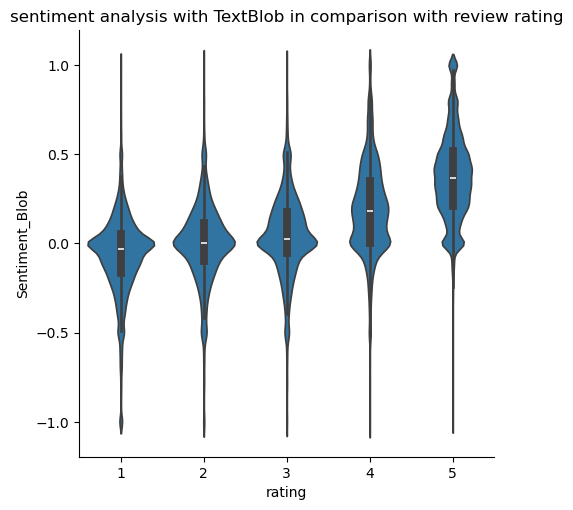

In [28]:
sns.catplot(x="rating",y="Sentiment_Blob", kind="violin", data=df)
plt.title("sentiment analysis with TextBlob in comparison with review rating");

In [7]:
# Initialise VADER Sentiment-Analyzer
sia = SentimentIntensityAnalyzer()

# Function giving the VADER sentiment back
def vader_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']  

# creating new column with VADER_sentiment
df['VADER_Sentiment'] = df['text'].apply(lambda text: vader_sentiment(str(text)))
df.head()

,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,answer,company,verification,answered,local_hour,local_date_posted,days_between_experience_and_post,day_of_week_posted,Sentiment_Blob,VADER_Sentiment
0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,The company rep I worked with made my…,0,Flashbay,0,0,21,2024-10-22,129,1,0.331111,0.5598
1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,I highly recommend using Flashbay,0,Flashbay,1,0,12,2024-10-16,0,2,0.374583,0.6879
2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Great customer service,0,Flashbay,1,0,10,2024-10-17,7,3,0.291284,0.9691
3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Outstanding Support and Attentive Service,0,Flashbay,1,0,15,2024-10-21,0,0,0.600000,0.9215
4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,My number-one go-to for computer…,0,Flashbay,0,0,21,2024-10-22,103,1,0.400000,0.8653


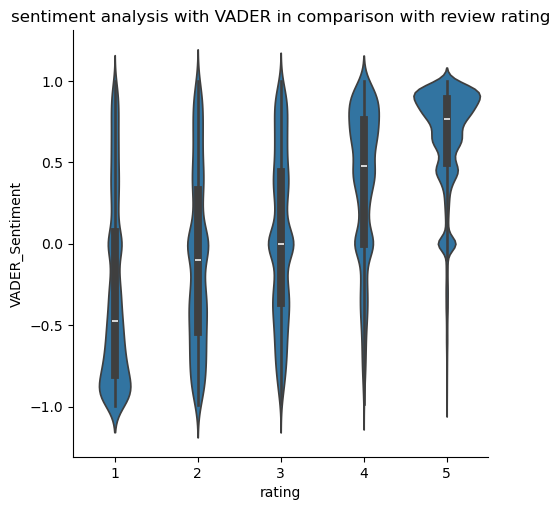

In [8]:

sns.catplot(x="rating",y="VADER_Sentiment", kind="violin", data=df)
plt.title("sentiment analysis with VADER in comparison with review rating");

In [9]:
# creating a new column with categorized values based on the TextBlob Sentiment
df["Sentiment_Blob_cat"]= pd.cut(df["Sentiment_Blob"], bins = [-1, -0.6, -0.2, 0.2, 0.6, 1], labels= [1, 2, 3, 4, 5])
df.head()

,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,answer,company,verification,answered,local_hour,local_date_posted,days_between_experience_and_post,day_of_week_posted,Sentiment_Blob,VADER_Sentiment,Sentiment_Blob_cat
0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,The company rep I worked with made my…,0,Flashbay,0,0,21,2024-10-22,129,1,0.331111,0.5598,4
1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,I highly recommend using Flashbay,0,Flashbay,1,0,12,2024-10-16,0,2,0.374583,0.6879,4
2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Great customer service,0,Flashbay,1,0,10,2024-10-17,7,3,0.291284,0.9691,4
3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Outstanding Support and Attentive Service,0,Flashbay,1,0,15,2024-10-21,0,0,0.600000,0.9215,4
4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,My number-one go-to for computer…,0,Flashbay,0,0,21,2024-10-22,103,1,0.400000,0.8653,4


In [10]:
# creating a new column with categorized values based on the VADER Sentiment
df["Sentiment_VADER_cat"]= pd.cut(df["VADER_Sentiment"], bins = [-1, -0.6, -0.2, 0.2, 0.6, 1], labels= [1, 2, 3, 4, 5])
df.head()

,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,answer,company,verification,answered,local_hour,local_date_posted,days_between_experience_and_post,day_of_week_posted,Sentiment_Blob,VADER_Sentiment,Sentiment_Blob_cat,Sentiment_VADER_cat
0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,The company rep I worked with made my…,0,Flashbay,0,0,21,2024-10-22,129,1,0.331111,0.5598,4,4
1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,I highly recommend using Flashbay,0,Flashbay,1,0,12,2024-10-16,0,2,0.374583,0.6879,4,5
2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Great customer service,0,Flashbay,1,0,10,2024-10-17,7,3,0.291284,0.9691,4,5
3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Outstanding Support and Attentive Service,0,Flashbay,1,0,15,2024-10-21,0,0,0.600000,0.9215,4,5
4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,My number-one go-to for computer…,0,Flashbay,0,0,21,2024-10-22,103,1,0.400000,0.8653,4,5


In [11]:
# creating crosstabs of the actual rating compared to the rating comming from the TextBlob
cm = pd.crosstab(df.rating, df.Sentiment_Blob_cat, rownames = ["Rating"], colnames = ["Sentiment category from TextBlob"])
cm

Sentiment category from TextBlob,1,2,3,4,5
Rating,,,,,
1,349,3429,13556,1302,76
2,44,590,3416,580,30
3,54,709,4545,1296,79
4,17,257,3482,2682,425
5,20,181,8328,21527,5817


In [18]:
# calculating true positives for TextBlob
TP_TextBlob = cm.loc[1,1]+cm.loc[2,2]+cm.loc[3,3]+cm.loc[4,4]+cm.loc[5,5]
total_num = df.shape[0]
TP_rate = TP_TextBlob/total_num
print(TP_rate)

0.19154532129696852


In [20]:
# creating crosstabs of the actual rating compared to the rating comming from the VADER
cm = pd.crosstab(df.rating, df.Sentiment_VADER_cat, rownames = ["Rating"], colnames = ["Sentiment category from VADER"])
cm

Sentiment category from VADER,1,2,3,4,5
Rating,,,,,
1,7901,4042,2813,2183,1948
2,1006,1176,1125,732,641
3,809,1534,1794,1378,1179
4,252,664,1257,1848,2843
5,206,811,3155,6912,24792


In [21]:
# calculating true positives for VADER
TP_VADER = cm.loc[1,1]+cm.loc[2,2]+cm.loc[3,3]+cm.loc[4,4]+cm.loc[5,5]
total_num = df.shape[0]
TP_rate = TP_VADER/total_num
print(TP_rate)

0.5138422761332037


In [23]:
# creating a column with the length of the review and a column with the length of the review header

df["len_review"] = df["text"].apply(lambda x: len(x.split()))
df["len_subject"] = df["subject"].apply(lambda x: len(x.split()))
df.head()

,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,answer,company,...,local_hour,local_date_posted,days_between_experience_and_post,day_of_week_posted,Sentiment_Blob,VADER_Sentiment,Sentiment_Blob_cat,Sentiment_VADER_cat,len_review,len_subject
0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,The company rep I worked with made my…,0,Flashbay,...,21,2024-10-22,129,1,0.331111,0.5598,4,4,31,8
1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,I highly recommend using Flashbay,0,Flashbay,...,12,2024-10-16,0,2,0.374583,0.6879,4,5,46,5
2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Great customer service,0,Flashbay,...,10,2024-10-17,7,3,0.291284,0.9691,4,5,46,3
3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Outstanding Support and Attentive Service,0,Flashbay,...,15,2024-10-21,0,0,0.600000,0.9215,4,5,26,5
4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,My number-one go-to for computer…,0,Flashbay,...,21,2024-10-22,103,1,0.400000,0.8653,4,5,31,5


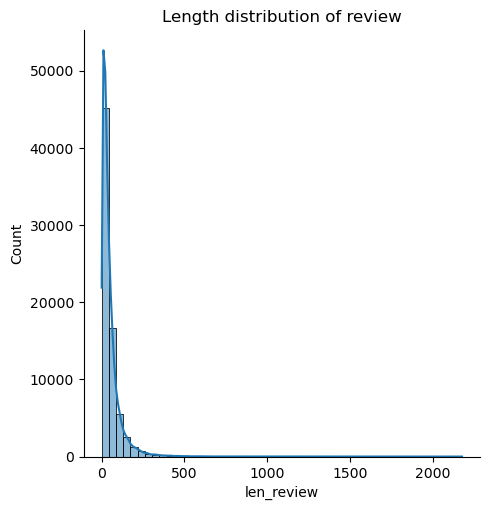

In [26]:
# distribution of the length of the review
sns.displot(df.len_review, kde = True, bins = 50)
plt.title("Length distribution of review");

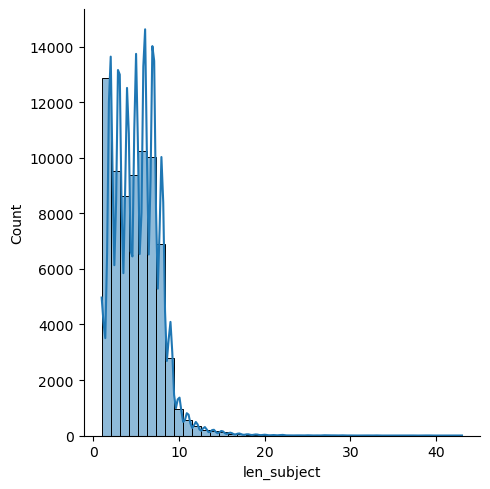

In [25]:
# distribution of the length of the subject
sns.displot(df.len_subject, kde = True, bins = 40);

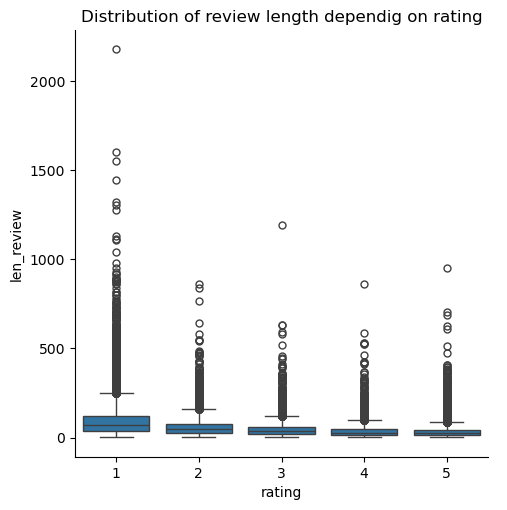

In [27]:
sns.catplot(x="rating",y="len_review", kind="box", data=df)
plt.title("Distribution of review length dependig on rating");

In [35]:
from scipy import stats
import statsmodels.api

#ANOVA: H0: ther is no significant effect of the "len_review" on the "Rating"
x= statsmodels.formula.api.ols("len_review ~ rating", data = df).fit()
result = statsmodels.api.stats.anova_lm(x)
print(result)

               df        sum_sq       mean_sq             F  PR(>F)
rating        1.0  4.802341e+07  4.802341e+07  13121.319307     0.0
Residual  72999.0  2.671729e+08  3.659953e+03           NaN     NaN


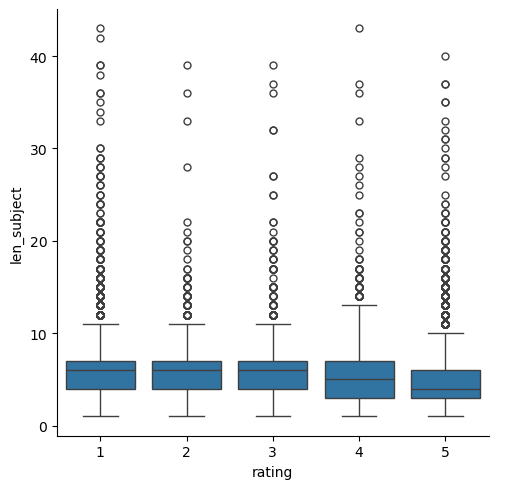

In [36]:
sns.catplot(x="rating",y="len_subject", kind="box", data=df);

In [37]:
#ANOVA: H0: ther is no significant effect of the "len_review" on the "Rating"
x= statsmodels.formula.api.ols("len_subject ~ rating", data = df).fit()
result = statsmodels.api.stats.anova_lm(x)
print(result)

               df         sum_sq       mean_sq            F  PR(>F)
rating        1.0   12139.536059  12139.536059  1706.078928     0.0
Residual  72999.0  519421.451325      7.115460          NaN     NaN


In [32]:
df.to_csv("trustpilot_extended.csv")

In [33]:
df2 = pd.read_csv(r"data\trustpilot_extended.csv")
df2.head()

,Unnamed: 0,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,answer,...,local_hour,local_date_posted,days_between_experience_and_post,day_of_week_posted,Sentiment_Blob,VADER_Sentiment,Sentiment_Blob_cat,Sentiment_VADER_cat,len_review,len_subject
0,0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,The company rep I worked with made my…,0,...,21,2024-10-22,129,1,0.331111,0.5598,4.0,4,31,8
1,1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,I highly recommend using Flashbay,0,...,12,2024-10-16,0,2,0.374583,0.6879,4.0,5,46,5
2,2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Great customer service,0,...,10,2024-10-17,7,3,0.291284,0.9691,4.0,5,46,3
3,3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Outstanding Support and Attentive Service,0,...,15,2024-10-21,0,0,0.600000,0.9215,4.0,5,26,5
4,4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,My number-one go-to for computer…,0,...,21,2024-10-22,103,1,0.400000,0.8653,4.0,5,31,5


In [ ]:
#changes
